###  Import Required Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import Ridge, Lasso 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

###  Load and Explore the Dataset

In [2]:
# Create sample dataset for Energy Consumption Prediction
data = {
    "Record_ID": [1,2,3,4,5,6,7,8,9,10,
                  11,12,13,14,15,16,17,18,19,20],
    "Temperature_C": [22.5, 35.1, 29.3, 18.2, 25.4, 31.8, 27.6, 19.9, 33.2, 28.0,
                      21.0, 30.5, 26.3, 24.8, 17.5, 34.0, 29.0, 20.4, 32.5, 23.7],
    "Humidity_%": [60, 35, 45, 80, 55, 40, 50, 78, 38, 47,
                   70, 43, 49, 58, 82, 37, 46, 75, 42, 65],
    "Wind_Speed_kmph": [5.0, 8.2, 7.5, 2.0, 6.3, 9.0, 5.8, 3.0, 7.7, 6.1,
                        4.5, 8.8, 5.5, 5.2, 1.8, 9.3, 7.0, 3.5, 8.1, 4.8],
    "Time_Hour": [9, 14, 20, 2, 11, 16, 18, 5, 13, 21,
                  8, 17, 15, 10, 3, 12, 19, 6, 22, 7],
    "Day_Type": ["Weekday","Weekday","Weekend","Weekend","Weekday","Weekday","Weekend","Weekend","Weekday","Weekend",
                 "Weekday","Weekday","Weekend","Weekday","Weekend","Weekday","Weekend","Weekend","Weekday","Weekday"],
    "Appliance_Usage_kWh": [3.5, 5.8, 4.6, 2.2, 4.0, 5.2, 4.4, 2.8, 5.5, 4.7,
                            3.1, 5.0, 4.3, 3.8, 2.1, 5.7, 4.5, 2.9, 5.3, 3.4],
    "Outdoor_Light_Intensity": [800, 950, 500, 100, 850, 900, 600, 150, 940, 550,
                                780, 920, 610, 870, 120, 930, 560, 200, 910, 740],
    "Energy_Consumption_kWh": [12.5, 20.2, 18.0, 9.8, 14.7, 19.1, 17.2, 10.5, 19.5, 18.3,
                               11.5, 18.8, 16.9, 13.2, 8.9, 20.0, 17.5, 11.0, 19.3, 12.0]
}

df = pd.DataFrame(data)

# Display first 5 rows 
print(df.head()) 
 
# Check missing values 
print(df.isnull().sum()) 
 
# Basic statistics 
print(df.describe())

   Record_ID  Temperature_C  Humidity_%  Wind_Speed_kmph  Time_Hour Day_Type  \
0          1           22.5          60              5.0          9  Weekday   
1          2           35.1          35              8.2         14  Weekday   
2          3           29.3          45              7.5         20  Weekend   
3          4           18.2          80              2.0          2  Weekend   
4          5           25.4          55              6.3         11  Weekday   

   Appliance_Usage_kWh  Outdoor_Light_Intensity  Energy_Consumption_kWh  
0                  3.5                      800                    12.5  
1                  5.8                      950                    20.2  
2                  4.6                      500                    18.0  
3                  2.2                      100                     9.8  
4                  4.0                      850                    14.7  
Record_ID                  0
Temperature_C              0
Humidity_%       

###  Preprocessing & Feature Engineering

In [5]:
# Convert categorical variables to numerical 
df = pd.get_dummies(df, drop_first=True) 
 
# Define Features (X) and Target (y) 
X = df.drop('Energy_Consumption_kWh', axis=1)  # 'Energy_Consumption_kWh' is the target variable 
y = df['Energy_Consumption_kWh'] 
 
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

###  Apply Cross-Validation 

In [6]:
model = RandomForestRegressor() 
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2') 
 
print("Cross-validation scores:", scores) 
print("Mean R2 Score:", scores.mean())

Cross-validation scores: [0.92273233 0.8719228  0.93686453 0.99865837 0.90603328]
Mean R2 Score: 0.9272422619448717


###  Hyperparameter Tuning using Grid Search

In [7]:
param_grid = { 
    'n_estimators': [50, 100, 200], 
    'max_depth': [5, 10, 15] 
} 
 
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2') 
grid_search.fit(X_train, y_train) 
 
print("Best Parameters:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 

Best Parameters: {'max_depth': 15, 'n_estimators': 200}
Best Score: 0.9450884333879699


### Feature Importance Analysis 

Feature Importance:
 Humidity_%                 0.375409
Appliance_Usage_kWh        0.180386
Time_Hour                  0.174927
Temperature_C              0.138653
Wind_Speed_kmph            0.093551
Outdoor_Light_Intensity    0.023289
Day_Type_Weekend           0.007321
Record_ID                  0.006463
dtype: float64


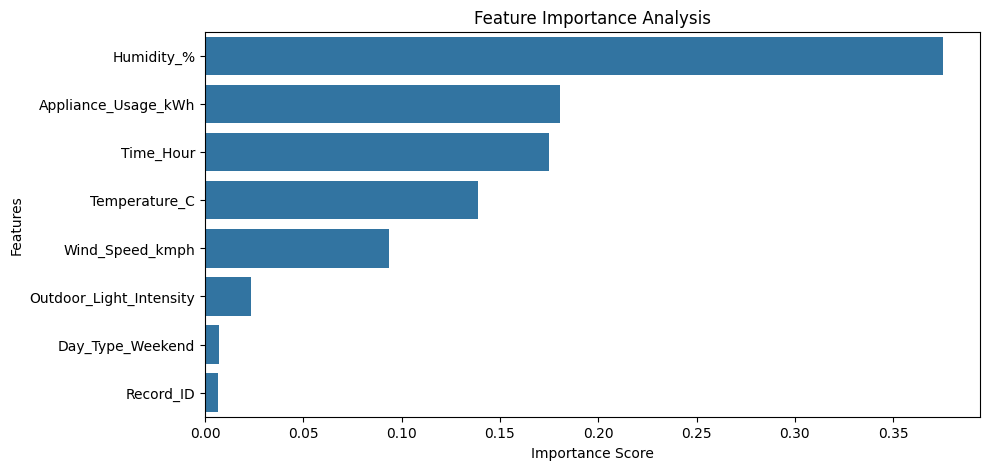

In [8]:
model = RandomForestRegressor(n_estimators=100) 
model.fit(X_train, y_train)
feature_importance = pd.Series(model.feature_importances_, 
index=X.columns).sort_values(ascending=False) 
print("Feature Importance:\n", feature_importance) 
 
plt.figure(figsize=(10, 5)) 
sns.barplot(x=feature_importance, y=feature_importance.index) 
plt.xlabel('Importance Score') 
plt.ylabel('Features') 
plt.title('Feature Importance Analysis') 
plt.show()

###  Avoid Overfitting using Regularization (Ridge/Lasso)

In [9]:
ridge = Ridge(alpha=1.0) 
ridge.fit(X_train, y_train) 
print("Ridge R2 Score:", ridge.score(X_test, y_test)) 
 
lasso = Lasso(alpha=0.1) 
lasso.fit(X_train, y_train) 
print("Lasso Coefficients:", lasso.coef_) 

Ridge R2 Score: 0.9808582033458914
Lasso Coefficients: [-0.02111609  0.17043705 -0.18248223  0.          0.07658942  0.
 -0.00148206 -0.        ]


###  Final Model Evaluation

In [10]:
best_model = grid_search.best_estimator_ 
y_pred = best_model.predict(X_test) 
 
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred)) 
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.951427255088722
MSE: 0.8605572499999985
MAE: 0.7639999999999993
